In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
#pip install tensorflow==2 
#pip install keras
#pip install --user tensorflow

In [2]:
os.listdir('E:/brain_detection/brain_tumor_dataset/TEST')


['New folder', 'NO', 'TEST2', 'TRAIN', 'VAL', 'yes']

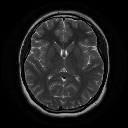

In [3]:
im =Image.open('E:/brain_detection/brain_tumor_dataset/TEST/no/1 no.jpeg').resize((128,128))
im

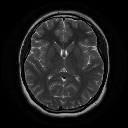

In [4]:
im =Image.open('E:/brain_detection/brain_tumor_dataset/TEST/no/1 no.jpeg').resize((128,128))
im

In [5]:
yes=os.listdir('E:/brain_detection/brain_tumor_dataset/TEST/yes')
no=os.listdir('E:/brain_detection/brain_tumor_dataset/TEST/no')

In [6]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [7]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [8]:
len(data_target)==len(data)


True

In [9]:
data_target


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
data


array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [11]:
yes_values=os.listdir('E:/brain_detection/brain_tumor_dataset/TEST/yes')
no_values=os.listdir('E:/brain_detection/brain_tumor_dataset/TEST/no')

In [12]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('E:/brain_detection/brain_tumor_dataset/TEST/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [13]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('E:/brain_detection/brain_tumor_dataset/TEST/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [14]:
len(X_data)==len(data)==len(data_target)


True

In [15]:
X = np.squeeze(X_data)


In [16]:
X.shape


(253, 32, 32, 3)

In [17]:
# normalize data
X = X.astype('float32')
X /= 255

In [18]:
#categorical_labels = to_categorical(data_target, num_classes=2)
data_target


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [20]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [21]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [23]:
from keras.callbacks import EarlyStopping

EPOCHS = 30
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=6
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=[es]
)

NameError: name 'train_generator' is not defined

In [24]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)


Train on 190 samples, validate on 63 samples
Epoch 1/150
190/190 [==============================] - 3s 13ms/sample - loss: 0.5914 - acc: 0.7947 - val_loss: 1.0482 - val_acc: 0.0000e+00
Epoch 2/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4627 - acc: 0.8158 - val_loss: 0.9559 - val_acc: 0.0000e+00
Epoch 3/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4667 - acc: 0.8158 - val_loss: 1.1117 - val_acc: 0.0000e+00
Epoch 4/150
190/190 [==============================] - 1s 5ms/sample - loss: 0.4513 - acc: 0.8158 - val_loss: 1.2571 - val_acc: 0.0000e+00
Epoch 5/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4644 - acc: 0.8158 - val_loss: 1.1076 - val_acc: 0.0000e+00
Epoch 6/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4425 - acc: 0.8158 - val_loss: 1.0483 - val_acc: 0.0000e+00
Epoch 7/150
190/190 [==============================] - 1s 6ms/sample - loss: 0.4450 - acc: 0.8158 - val_loss: 1.0273 - v

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [54]:
# Evaluate the model on test set
from sklearn.metrics import accuracy_score,confusion_matrix

score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


confusion_mtx = confusion_matrix(y_valid, score) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)


 Test accuracy: 0.71428573


ValueError: Found input variables with inconsistent numbers of samples: [63, 2]

In [51]:
# validate on val set
predictions = model.predict(x_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_val, predictions)
print('Val Accuracy = %.2f' % accuracy)


NameError: name 'accuracy_score' is not defined

In [27]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

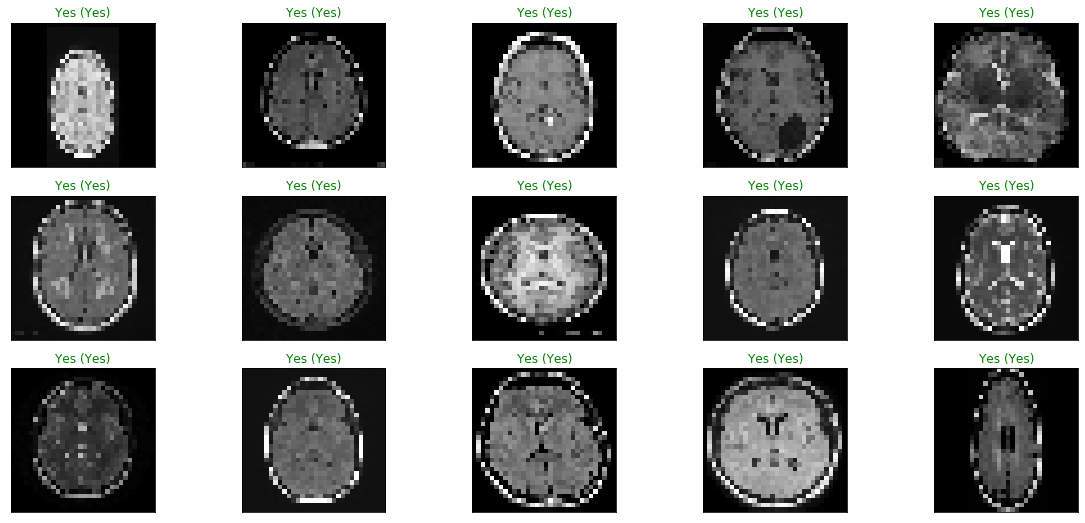

In [28]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 9))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()